# 机器学习与社会科学应用

# 第八章 特征工程入门与实践

<font face="宋体" >郭峰    
    教授、博士生导师  
上海财经大学公共经济与管理学院  
上海财经大学数实融合与智能治理实验室  
    邮箱：guofengsfi@163.com</font> 

<font face="宋体" >本章目录：  
第一节 特征工程简介  
第二节 特征理解：探索性分析  
第三节 特征增强：清洗数据  
第四节 特征构造：生成新数据  
第五节 特征选择：筛选属性  
第六节 特征转换：数据降维</font> 

## 第一节 特征工程简介

维基百科对特征工程的定义
>Feature engineering or feature extraction or feature discovery is the process of using domain knowledge to extract features (characteristics, properties, attributes) from raw data. The motivation is to use these extra features to improve the quality of results from a machine learning process, compared with supplying only the raw data to the machine learning process.

特征工程（Feature Engineering）是从原始数据中提取特征并将其转换为适合机器学习的格式，从而改善机器学习性能，即提高预测准确度，同时减少运行时间。业界流传着一句话：数据和特征决定了机器学习的上限，而模型和算法只是逼近这个上限而已。那特征工程到底是什么呢？顾名思义，其本质是一项工程活动，目的是最大限度地从原始数据中提取有价值特征以供算法和模型使用。

特征工程的性能包含模型的预测性能与模型的元指标两方面。
其中预测性能根据任务的不同而不同，分类任务可以使用如下指标：
- 真阳性率和假阳性率
- 灵敏度（真阳性率）和特异性；
- 假阴性率和假阳性率。
回归任务则可以使用：
- 平均绝对误差
- R方

元指标，即不直接与模型预测性能相关的指标，包括：
- 模型拟合、训练所需的时间
- 拟合后的模型预测实例的时间
- 需要持久化（永久保存）的数据大小

为了提取知识和做出预测，机器学习使用数学模型来拟合数据。这些模型将特征作为输入。

特征就是原始数据某个方面的数值表示。在机器学习流程中，特征是数据和模型之间的纽带。
  
经典特征工程包括特征理解、特征增强、特征构建、特征选择和特征转换等五个步骤，从而为进一步提高机器学习性能作准备。

## 第二节 特征理解：探索性分析

特征理解就是理解我们的数据特征，对数据有初步、总体的认识。具体而言，就是考察数据规模（行数、列数）、数据类型（结构化还是非结构化，定量还是定性）、数据等级（定类等级、定序等级、定距等级、定比等级）、数据的统计信息、数据的分布、数据之间的关系等。下面就通过一个经典的鸢尾花案例演示如何进行探索性分析。探索性分析（EDA，Exploratory Data Analysis）本质上就是刚拿到数据，对数据的整体规模、结构、数据之间的关系等还不清楚，需要进行探索，从而为进一步的数据分析打下基础。

### 2.1 查看数据概况

这部分主要是查看数据的规模、列名、非空行数、数据类型（数值型还是字符型），从而对数据有一个总体的认识。

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

path = "D:/python/机器学习与社会科学应用/演示数据/08特征工程入门与实践/"
iris = pd.read_csv(path+"iris.csv")
print(iris.shape)

# 查看数据基本信息:
iris.info()

# 显示缺失值数量
iris.isnull().sum()

# 查看前5行，自己可以设置
iris.head()

# 随机查看5行
iris.sample(5)

# 查看末尾五行
iris.tail()

### 2.2 查看数据统计信息

####  描述性统计

数据等级

等级 | 属性 | 例子 | 描述性统计 | 图表 
- | - | - | - | -
定类 | 离散, 无序 | 种类 | 频率/占比, 众数 | 条形图, 饼图
定序 | 有序类别, 比较 | 考试等级 |　频率, 众数, 中位数, 百分数 | 条形图，饼图，茎叶图
定距 | 数字差别有意义 | 摄氏度,年份 | 频率,众数,中位数,均值,标准差 | 条形图, 饼图, 茎叶图, 箱线图, 直方图
定比 | 连续, 可以做加减乘除运算 | 金钱, 重量 | 均值, 标准差 | 直方图, 箱线图

In [ ]:
# 查看连续变量数据的统计特征：频数、均值、标准差、最大、最小、分位数
print(iris.describe().T)

# 查看离散变量数据的分布，判断属于什么数据等级
print(iris.species.describe())

通过这个部分的分析可知，前四列数据为数值便来给你，属于定比等级，最后1列为定类等级，即类别变量。

#### 变量分布

通过图形，我们可以直观地看到每列数据的分布

In [ ]:
# 直方图
iris.hist()
# 直方图设置，将数据分为20组，使用蓝色画图，并添加标签与标题
# iris.sepal_length.hist(bins=20, color='b')
# plt.xlabel('sepal_length')
# plt.title('Iris Data')

# 核密度图
iris.plot.density()
# iris.plot.density(subplots=True)
# iris.sepal_length.plot.density()

# 同时画sepal_length的直方图与核密度图
sns.distplot(iris.sepal_length, rug=True)

# 箱型图
iris.plot.box()
# iris.sepal_width.plot.box()
# 画不同品种（species）的鸢尾花的花萼宽度（sepal_width）
# sns.boxplot(x='species', y='sepal_width', data=iris)

# 饼图（适用于类别变量）
# 单独展示，否则与上图有重叠，如果分类较多，可以设置前五项
iris.species.value_counts()
iris.species.value_counts().sort_values(ascending=False).head(5).plot(kind='pie')

#### 分组统计

In [ ]:
iris_grouped = iris.groupby('species')

# 查看相关系数
iris_grouped.corr()

# 查看所有分组的统计指标
iris_grouped.describe()

# 查看petal_length变量的统计指标
iris_grouped.petal_length.describe()

# 查看所有变量的分组平均值
iris_grouped.mean()

# 计算所有变量的分组平均值与分组标准差，使用agg()方差（表示aggregate，即合计）
iris_grouped.agg(['mean', 'median', 'std'])

# 计算不同变量的统计值
iris_grouped.agg({'sepal_length': 'mean', 'sepal_width': 'mean', 'petal_length': 'std', 'petal_width': 'std'})

# 自定义四分位距指标
def iqr(x):
    return x.quantile(0.75) - x.quantile(0.25)
iris_grouped.agg(iqr)

## 2.3 变量相关性探索

###  整体相关系数矩阵

In [ ]:
# 考察变量之间的相关系数矩阵
corr = iris.corr()
print(corr)

sns.heatmap(corr)

#### 分组相关系数矩阵

In [ ]:
iris_grouped = iris.groupby('species')
# 查看分组相关系数
iris_grouped.corr()

sns.heatmap(iris_grouped.corr())

#### 散点图 
如果我们更关心变量之间的关系，而两个变量之间的散点图（scatter plot）是常用的画图工具。可用seaborn的scatterplot()函数画散点图。

In [ ]:
sns.scatterplot(x='petal_length', y='petal_width', data=iris)

# 用不同的颜色表示不同的鸢尾花品种
sns.scatterplot(x='petal_length', y='petal_width', data=iris, hue='species')

# 以不同颜色和不同图标区分鸢尾花品种
sns.scatterplot(x='petal_length', y='petal_width', data=iris, style='species', hue='species')

# 画两两变量的散点图
sns.pairplot(data=iris, height=2)

# 画部分变量的散点图，并在主对角线上画核密度图
sns.pairplot(iris, diag_kind='kde', vars=['sepal_length', 'sepal_width', 'petal_length'], hue='species')

## 第三节 特征增强：清洗数据

该阶段的目的是清洗和增强数据，将数据转化为机器学习模型能够直接使用的格式。清洗数据是指调整已有的列和行，增强数据是指在数据集中删除和添加新的列。特征增强的意义是，识别有问题的区域，并确定哪种修复方法最有效，。

通过特征提取，我们能得到未经处理的特征，这时的特征可能存在以下问题：
- **不属于同一量纲**：即特征的规格不一样，不能够放在一起比较。无量纲化可以解决这一问题。
- **信息冗余**：对于某些定量特征，其包含的有效信息为区间划分，例如学习成绩，假如只关心“及格”或不“及格”，那么需要将定量的考分，转换成“1”和“0”表示及格和未及格。二值化可以解决这一问题。
- **定性特征不能直接使用**：某些机器学习算法和模型只能接收定量特征的输入，那么需要将定性特征转换为定量特征。最简单的方式是为每一种定性值指定一个定量值，但是这种方式过于灵活，增加了调参的工作。通常使用哑编码的方式将定性特征转换为定量特征：假设有N种定性值，则将这一个特征扩展为N种特征，当原始特征值为第i种定性值时，第i个扩展特征赋值为1，其他扩展特征赋值为0。哑编码的方式相比直接指定的方式，不用增加调参的工作，对于线性模型来说，使用哑编码后的特征可达到非线性的效果。
- **存在缺失值**：缺失值需要补充。
- **异常值需要处理**：异常值可能会影响模型的预测结果，因而需要处理。
- **信息利用率低**：不同的机器学习算法和模型对数据中信息的利用是不同的，之前提到在线性模型中，使用对定性特征哑编码可以达到非线性的效果。类似地，对定量变量多项式化，或者进行其他的转换，都能达到非线性的效果。

### 3.1 缺失值处理

有些特征可能因为无法采样或者没有观测值而缺失。例如位置特征，用户可能禁止获取地理位置或者获取地理位置失败，形成缺失值，缺失值的存在会对模型的预测结果产生影响，因而需要进行处理。  
详细参考：https://zhuanlan.zhihu.com/p/537865122

#### 识别缺失值

在原始数据中，缺失值可能直接以空值显示，这种情况下可以直接进行统计；另一种情况是空值可能以某些特殊的值表示，比如0、99、？等，这时就需要数据使用者手动进行转换。

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame([[1, np.nan, pd.NaT], [None, 'b', np.nan]])
print(df)

# 统计每列的空值
df.isnull().sum()

自定义缺失值识别

In [ ]:
import pandas as pd

df = pd.DataFrame([[1, '?', 3], ['?', 4, '?'], [7, 8, '?']], index=list("ABC"))
print(df)

# 统计自定义缺失值的数量
df.isin(['?']).sum()

#### 缺失值处理

对缺失值处理主要有两种方式：  
- 删除缺失值，这种一般适用于数据集中缺失值较少的情况，如果缺失值比例超过10%，那么删除数据会对数据分析结果有很大影响，不合理；
- 填充值，填充的值可以是均值、中位值、前值、后值，对于分类变量而言，可以是众数，此外还可以进行插值，如二次曲线插值，某些情况下也可以填充0，可以根据实际情况选择合适的填充值。

####  删除缺失值

删除缺失值，必然会导致数据量的减少，如果缺失值占数据的比例较大，比例超过了数据的10%（具体标准根据项目来定），删除数据对数据分析的结果会有很大影响，可以对其进行合理的填充。

语法：dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

- axis: 默认为0（'index')，按行删除，即删除有空值的行。将axis参数修改为1或'columns'，则按列删除，即删除有空值的列；
- how: 参数默认为any，只有有一行（或列）数据中有空值就会删除该行（或列）。将how参数修改为all，则只有一行（或列）数据中全部都是空值才会删除该行（或列）。
- thresh: 表示删除空值的阈值，传入一个整数。如果一行（或列）数据中存在少于thresh个非空值（non-NA values），则删除该行（或列）。
- subset：删除空值是，只判断subset指定的列（或行）的子集，其他列（或行）中的空值忽略，不处理。
- inplace: 默认为False，返回元数据的一个副本。将inplace参数修改为True，则会修改数据本身。 



In [ ]:
import pandas as pd 

df = pd.DataFrame([[1, 2, 3], [np.nan, 5, pd.NaT], [7, 8, 9],
                  [np.nan, np.nan, np.nan], [None, 14, 15]], 
                 index=['one', 'two', 'three', 'four', 'five'],
                 columns=list('ABC'))
print(df)

# 将超过2个空值的行删除
df.dropna(thresh=2)

####  填充缺失值

语法： fillna(value=None, method=None, axis=None, inplace=False, limit=None)

- value: 表示填充的值，可以是一个指定值，也可以是字典，series或DataFrame
- method: 填充的方式，默认为None。有ffill、pad、bfill、backfill四种方式。ffill和pad表示用缺失值的前一个值填充，如果axis=0，则用空值上一行的值填充，如果axis=1，则用空值左边的值填充。加入空值在第一行或第一列，以及空值前面的值全都是空值，则无法获取到可用的填充之，填充后依然为空值。bfill和backfill表示用缺失值的后一个值填充，axis的用法以及找不到填充值的情况同ffill和pad。
- axis: 通常配合method参数使用，axis=0表示行，axis=1表示按列
- limit: 表示填充执行的次数。如果是按行填充，则填充一次表示执行一次，按列同理。

In [ ]:
import pandas as pd 

df = pd.DataFrame([[1, 2, 3], [np.nan, 5, pd.NaT], [7, 8, 9],
                  [np.nan, np.nan, np.nan], [None, 14, 15]], 
                 index=['one', 'two', 'three', 'four', 'five'],
                 columns=list('ABC'))
print(df)

# 前一个值填充
df.fillna(method='ffill')

# 不同列填充不同值
values = {'A':100, 'B': 200, 'C': 300}
df.fillna(value=values, limit=2)

# 该列均值进行填充
df.fillna(df.mean())

# 该列的中位值进行填充
df.fillna(df.median())

# 该列的众数进行填充
df['C'].fillna(df['C'].mode()[0])

####  插值

除了直接使用统计量或特定值进行填充，还可以使用具体函数进行插值填充。Series与DataFrame对象都可以用interpolate()函数进行插值，默认对缺失值进行线性插值。此外可以通过参数method进行调整：

- 如果数据为一个时间序列且有增长的趋势，那么使用二次曲线，即method='quadratic'可能比较合适
- 如果数据的值接近一个累积分布函数，则method='pchip'应该比较合适 - 如果为了平滑曲线，考虑method='akima'
- 此外，还可以插入样条曲线，即method="spline", 或多项式,method="polynomial"，但这两个还需要指定阶数

In [ ]:
# 插值，默认使用线性插值
import pandas as pd 

df = pd.DataFrame(
    {
        "A": [1, 2.1, np.nan, 4.7, 5.6, 6.8],
        "B": [0.25, np.nan, np.nan, 4, 12.2, 14.4],
    }
)
print(df)

# 使用线性插值
df.interpolate()

# 二次样条曲线
df.interpolate(method='spline', order=2)


# 二次多项式
df.interpolate(method='polynomial', order=2)

#### 不处理

LightGBM和XGBoost都能将NaN作为数据的一部分进行学习，所以不需要处理缺失值。

### 3.2 异常值处理

异常值，也称为噪声数据，是指那些在数据集中存在的不合理的值，需要注意的是，不合理的值是偏离正常范围的值，不是错误值。比如人的身高为2.4m，体重为1吨等，虽然这些值确实可能存在，但是过于偏离正常范围，因而属于异常值。异常值会对结果造成偏差，所以在数据分析过程中需要重视。从本质上说，根据中心极限定理，总体均值近似服从正态分布，大部分数据其实集中在一个较小的范围内，而我们要研究的目标是适合大样本的规律，因而，对于这些异常值，其实不是我们的研究对象，但是在技术上，如果我们不对异常值处理，可能使结果产生偏差，因而，我们需要对异常值进行处理。  

#### 识别异常值

#### 简单统计分析

简单的统计分析。最常用的统计量是最大值与最小值，可以用来判断这个变量的取值是否超出合理的范围。例如，使用df.describe()查看数据的统计信息是否合理，该数据为美国波士顿的住房数据为例，展示数据是否合理，相关变量的定义如下：
CRIM：每个城镇的人均犯罪率
ZN：超过25,000平方英尺的住宅用地所占比例
INDUS：每个城镇的非零售商业用地比例
CHAS：查尔斯河虚拟变量（如果地块与河流接壤，则为1；否则为0）
NOX：一氧化氮浓度（每千万分之一）
RM：每个住宅的平均房间数
AGE：建于1940年之前的自住单位所占比例
DIS：到波士顿五个就业中心的加权距离
RAD：到径向高速公路的可达性指数
TAX：每1万美元的全额财产税率
PTRATIO：每个城镇的师生比例
B：1000(Bk - 0.63)^2，其中Bk是城镇中黑人的比例
LSTAT：人口中地位较低的人所占的百分比
MEDV：自住房屋的中位数价值（以千美元为单位）
具体示例代码为：：

In [ ]:
# 加载数据
import pandas as pd
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
%matplotlib inline

path = "D:/python/机器学习与社会科学应用/演示数据/08特征工程入门与实践/"

df = pd.read_csv(path+'boston.csv')
print(df.head())
df.describe()

####  3$\sigma$原则

如果样本近似服从正态分布，根据正态分布的特点，如果样本值位于均值加上或减去3倍标准差之外的概率为0.003，属于小概率事件，因而我们可以将其视为异常值。在实践中，首先通过数据的直方图和密度图观察样本分布，然后计算z-score进行定量判断: 
$z-score=\frac{x-mean(X)}{std(X)}$，其中,X某列数据,x为该列的某行的值.

In [ ]:
# 将样本值位于大于或小于均值加上或减去3倍标准差的值定义为异常值，并进行标记为空值
def detect_outliers(filename, attribute, threshold=3, fill_value=np.nan):
    """功能:探测异常值:
    Args:
        filename: 为数据集,
        attribute: 为要识别的特征,
        threshold: 为要设定的门槛值,默认为3倍标准差,
        fill_value: 为对异常值进行标记值
    """ 
    outliers_ll = filename[attribute].mean() - threshold*filename[attribute].std()
    outliers_ul = filename[attribute].mean() + threshold*filename[attribute].std()
    # 将异常值标记为
    filename[attribute].where((filename[attribute]<outliers_ul) | (filename[attribute]>outliers_ll), fill_value)
    return filename

# 对数据集df的'TNDUS'的异常值标记为True
df = detect_outliers(df, 'INDUS', True)
# 显示异常值的行
df[df['INDUS']==True]

#### 箱型图分析

箱型图非常适合做异常值观察的图形，箱型图的五根线从上到下依次表示为最大值、最小值、上四分位、下四分位和中位数，最大值区间：上四分位+1.5IQR，最小值区间：下四分位-1.5IQR，其中IQR=上四分位-下四分位，高于最大值或小于最低值被认为是异常值。 因此，异常值通常被定义为小于QL-1.5IQR或者大于QU+1.5IQR的值，QL为下四分位数，QU为上四分位数。

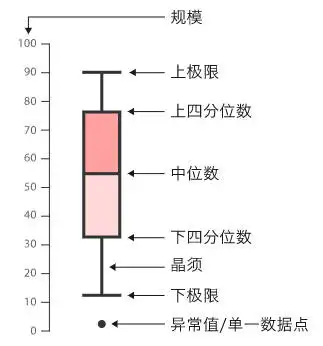

In [ ]:
# 查看箱型图与散点图
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

path = "D:/python/机器学习与社会科学应用/演示数据/08特征工程入门与实践/"

df = pd.read_csv(path+'boston.csv')
df.head()
# 箱型图
df['INDUS'].plot.box()
# 散点图
df.plot.scatter(x='INDUS', y='TAX')
# 可以看到异常值分布

In [ ]:
# 将位于上极限与下极限之外的点定义为异常点，并标记为空值
def detect_outliers(filename, attribute, fill_value=np.nan):
    """功能:探测异常值:
    Args:
        filename: 为数据集,
        attribute: 为要识别的特征,
        fill_value: 为对异常值进行标记值
    """ 
    q1 = filename[attribute].quantile(0.25)
    q3 = filename[attribute].quantile(0.75)
    iqr = q3 - q1
    # 下界
    outliers_ll = q1 - 1.5*iqr
    # 上界
    outliers_ul = q3 + 1.5*iqr
    # 将异常值标记为fill_value
    filename[attribute].where((filename[attribute]<outliers_ul) | (filename[attribute]>outliers_ll))
    filename[filename[attribute]==fill_value]
    return filename

# 对数据集df的'INDUS'列的异常值标记为True
df = detect_outliers(df, 'INDUS', True)
# 显示异常值的行
df[df['INDUS']==True]

#### 异常值处理

#### 删除

直接将含有异常值的记录删除，通常有两种策略：整条删除或成对删除。这种方法最简单易行，但缺点也不容忽视，一是在观测值很少的情况下，这种删除操作会造成样本量不足；二是直接删除可能会对变量的原有分布造成影响，从而导致统计模型不稳定。

In [ ]:
def detect_outliers(filename, attribute, threshold=3, fill_value=np.nan):
    """功能:探测异常值:
    Args:
        filename: 为数据集,
        attribute: 为要识别的特征,
        threshold: 为要设定的门槛值,默认为3倍标准差,
        fill_value: 为对异常值进行标记值
    """ 
    outliers_ll = filename[attribute].mean() - threshold*filename[attribute].std()
    outliers_ul = filename[attribute].mean() + threshold*filename[attribute].std()
    # 将异常值标记为
    filename[attribute].where((filename[attribute]<outliers_ul) | (filename[attribute]>outliers_ll), fill_value)
    return filename

# 将数据集df的"INDUS"列的异常值删除
df = detect_outliers(df, 'INDUS')
df.dropna(subset=['INDUS'], inplace=True)

####  视为缺失值

利用处理缺失值的方法来处理。这一方法的好处是能够利用现有变量的信息，来填补异常值。需要注意的是，将该异常值视为缺失值处理，需要根据该异常值（缺失值）的特点来进行，针对该异常值（缺失值）是完全随机缺失的、随机确实还是非随机缺失的不同情况进行不同的处理。

In [ ]:
def detect_outliers(filename, attribute, threshold=3, fill_value=np.nan):
    """功能:探测异常值:
    Args:
        filename: 为数据集,
        attribute: 为要识别的特征,
        threshold: 为要设定的门槛值,默认为3倍标准差,
        fill_value: 为对异常值进行标记值
    """ 
    outliers_ll = filename[attribute].mean() - threshold*filename[attribute].std()
    outliers_ul = filename[attribute].mean() + threshold*filename[attribute].std()
    # 将异常值标记为
    filename[attribute].where((filename[attribute]<outliers_ul) | (filename[attribute]>outliers_ll), fill_value)
    return filename

# 将数据集df的"INDUS"列的异常值表示为缺失值
df = detect_outliers(df, 'INDUS')
df[df['INDUS']==np.nan]

#### 缩尾或盖帽法

在经济学中，这种方法被称为“缩尾”，在数据分析领域，该方法也被称为“盖帽法”。该方式是将整列替换数据框99%以上和1%以下的点，将99%以上的点值=99%的点值；小于1%的点值=1%的点值。

In [ ]:
import pandas as pd
import numpy as np

def winsor(x, quantile=[0.01, 0.99]):
    """缩尾法处于异常值
    Args:
        x: pd.Series列,连续变量
        quantile: 指定缩尾的上下分位数范围
    """
    # 生成分位数
    Q01, Q99 = x.quantile(quantile).values.tolist()
    print(Q01, Q99)
    # 替换异常值为指定的分位数
    if Q01 > x.min():
        x = x.copy()
        x.loc[x<Q01] = Q01
    if Q99 < x.max():
        x = x.copy()
        x.loc[x>Q99] = Q99
    return x

sample = pd.DataFrame({'normal': np.random.randn(1000)})
sample.hist(bins=50)
winsor_sample = sample.apply(winsor)
winsor_sample.hist(bins=50)

#### 分箱法

分箱法通过考察数据的“近邻”来光滑有序数据的值。有序值分布到一些桶中或箱中。包括等深分箱：每个分箱的样本量一致；等宽分箱：每个分箱中的范围一致。

####  不处理

根据该异常值的性质和特点，使用更加稳健模型来修饰，然后直接在该数据集上进行数据挖掘。

### 3.3 类别变量编码

特征的数据类型可分为两大类，即连续型和离散型。其中离散型特征既有数值型的，也有类别型的。例如，性别（男、女）、成绩等级（A、B、C）等。连续型特征的原始形态就可以作为模型的输入，无论是LR、神经网络，还是SVM、GBDT、xgboost等。但是除了决策树等少数模型等直接处理字符串形式的类别型特征外，逻辑回归、支持向量机等模型的输入必须是数值型特征才能进行训练。因此，就需要将离散型中的类别型特征转换成数值型的。

#### 序号编码（Ordinal Encoding）

**序号编码通常用于处理类别间具有内在大小顺序关系的数据**，对于一个具有m个类别的特征，我们将其对应地映射到[0, m-1]的整数。例如对于”学历”这样的类别，”学士”、”硕士”、”博士” 可以很自然地编码成 [0,2]，因为它们内在就含有这样的逻辑顺序。但如果对于“颜色”这样的类别，“蓝色”、“绿色”、“红色”分别编码成[0,2]是不合理的，因为我们并没有理由认为“蓝色”和“绿色”的差距比“蓝色”和“红色”的差距对于特征的影响是不同的。

sklearn.preprocessing中的OrdinalEncoder进行处理，可以通过两种方式进行编码：
- 方法1：先将数据categorical_df载入encoder中，再将载入的数据进行OrdinalEncoder编码
- 方法2：直接载入encoder并编码

In [ ]:
import pandas as pd 
from sklearn.preprocessing import OrdinalEncoder 

categorical_df = pd.DataFrame({'my_id': ['101', '102', '103', '104'],
                              'name': ['allen',  'chartten', 'bob','dory'],
                              'place': ['third', 'second', 'first', 'second']})

print(categorical_df)
print('-'*30)

encoder = OrdinalEncoder()  # 创建OrdinalEncoder对象

# 方法1
encoder.fit(categorical_df)  # 将数据categorical_df载入encoder中进行转换
categorical_df = encoder.transform(categorical_df)  

# 方法2
#categorical_df = encoder.fit_transform(categorical_df)  # 代替上面的fit()和transform()

print(categorical_df)

####  独热编码（One-hot Encoding）

如果类别特征本身有顺序（例：优秀、良好、合格、不合格），那么可以保留单列自然数编码，但是如果类别特征没有明显的顺序（例：红、黄、蓝），则可以使用独热编码（One-Hot Encoding），即每个类作为1个特征。输出的矩阵是稀疏的，含有大量的0.独热编码通常用于处理类别间不具有大小关系的特征。可以通过导入sklearn.preprocessing中的OneHotEncoder，创建哑变量进行处理。对于独热编码，存在类别就生成几个特征。Pandas与sklearn都提供了独热编码方式。

In [ ]:
# 方法一
import pandas as pd 

df = pd.DataFrame({'f1': ['A', 'B', 'C'],
                  'f2': ['Male', 'Female', 'Male']})

print(df)

df = pd.get_dummies(df, columns=['f1', 'f2'])
print(df)

In [ ]:
# 方法二
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')  # handle_unknown

df = pd.DataFrame({'f1': ['A', 'B', 'C'],
                  'f2': ['Male', 'Female', 'Male']})

array = enc.fit_transform(df).toarray()
print(array)
df = pd.DataFrame(array)
df

#### 标签编码（Label Encoding）

Label Encoding是给某一列数据编码，而Ordinal Encoding是给所有的特征编码。因此，Label Encoding常用于给标签（label）编码，而Ordinal Encoding常用于给数据集中的特征编码。

In [ ]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder 

categorical_df = pd.DataFrame({'my_id': ['101', '102', '103', '104', '102'],
                              'name': ['allen', 'chartten', 'bob', 'dory', 'bob'],
                              'place': ['third', 'second', 'first', 'second', 'third']})

print(categorical_df)
print('-'*30)

encoder = LabelEncoder()
categorical_df['place'] = encoder.fit_transform(categorical_df['place'])
categorical_df

### 3.4 特征缩放

有些特征的值是有界限的，比如经度和维度，但有些数值型特征可以无限制地增加，比如计数值。有些模型是输入的平滑函数，比如线性回归模型、逻辑回归模型或包含矩阵的模型，它们会受到输入尺度的影响。相反，那些基于树的模型则根本不在乎输入尺度有多大。如果模型对输入特征的尺度很敏感，就需要进行特征缩放。特征缩放会改变特征的尺度，有些人将其称为特征归一化。特征缩放通常对每个特征独立进行。

对于数据尺度不相同, 可以选用某种归一化操作, 在机器学习流水线上处理该问题. 特征缩放操作旨在将行和列对齐并转化为一致的规则.例如, 归一化的一种常见形式是将所有定量列转化为同一个静态范围中的值(例如,所有数都位于0-1). 我们也可以使用数学规则,例如所有列的均值和标准差必须相同, 以便在同一个直方图上显示. 标准化通过确保所有行和列在机器学习中得到平等对待,让数据保持一致. 常见的标准化方法有: - z分数标准化 - min-max标准化 - 行归一化

不论使用何种缩放方法，特征缩放总是将特征除以一个常数（称为归一化常数）。因此不会改变但特征分布的形状。

当一组输入特征的尺度相差很大时，就需要进行特征缩放。例如，一个人气很高的商业网站的日访问量可能是几十万次，而实际购买可能只有几千次。如果两个特征都被模型所使用，那么模型就需要在确定如何使用它们时先平衡一下尺度。如果输入特征的尺度差别非常大，就会对模型的训练算法带来数值稳定性方面的问题。在这种情况下，就应该对特征进行标准化。

In [ ]:
# 导入数据
from sklearn.datasets import load_iris
 
#导入IRIS数据集
iris = load_iris()

#特征矩阵
iris.data

#目标向量
iris.target

#### Z分数标准化

z分数标准化是最常见的标准化技术,利用统计学里简单的z分数(标准分数)思想. z分数标准化的输出会被重新缩放,使均值为0, 标准差为1. 通过缩放特征, 统一化均值和方差(标准差的平方), 可以让KNN这种模型达到最优化,而不会倾向于较大比例的特征.
$$z=\frac{x-\mu}{\sigma}$$
其中z为新的值(z分数), x是原数据, $\mu$是该列的均值, $\sigma$是列的标准差

In [ ]:
from sklearn.preprocessing import StandardScaler
 
#标准化，返回值为标准化后的数据
standard = StandardScaler()  # 对象实例化
zscore = standard.fit_transform(iris.data)  # 调用实例方法
zscore

此外，也可以手动计算

In [ ]:
import numpy as np

# 创建一个示例数据集
data = np.array([[1.0, 2.0, 3.0],
                 [4.0, 5.0, 6.0],
                 [7.0, 8.0, 9.0]])

# 计算特征的均值和标准差
mean = np.mean(data, axis=0)
std = np.std(data, axis=0)

# 执行标准化操作
standardized_data = (data - mean) / std

print("原始数据：")
print(data)
print("标准化后的数据：")
print(standardized_data)


#### 区间缩放（min-max标准化）

min-max标准化与z-score标准化类似, 它是将原数据缩放为[0,1]的区间.
公式为:$m = \frac{x-x_{min}}{x_{max}-x_{min}}$, 其中m为新的值,x为原数据, $x_{min}$为该列最小值, $x_{max}$为该列最大值.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#区间缩放，返回值为缩放到[0, 1]区间的数据
zoom = MinMaxScaler()
minmax=zoom.fit_transform(iris.data)
minmax

此外，也可以手动计算

In [ ]:
import numpy as np

# 创建一个示例数据集
data = np.array([[1.0, 2.0, 3.0],
                 [4.0, 5.0, 6.0],
                 [7.0, 8.0, 9.0]])

# 计算特征的最小值和最大值
min_val = np.min(data, axis=0)
max_val = np.max(data, axis=0)

# 执行归一化操作（将特征缩放到[0, 1]范围内）
normalized_data = (data - min_val) / (max_val - min_val)

print("原始数据：")
print(data)
print("归一化后的数据：")
print(normalized_data)


####  行归一化

该标准化方法是关于行的,而不是关于列的.行归一化不是计算每列的统计值(均值,标准差等), 而是会保证每行有单位范数(unit norm), 意味着每行的向量长度相同. 如果每行数据都在一个n为空间内,那么每行都有一个向量范数(长度). 也就是说, 每行都是空间内的一个向量:$x=(x1, x2, ..., xn)$. 通俗地理解, 行归一化就是把每一行看成一个向量,然后转化为单位向量.

L2范数:$||x||=\sqrt{(x^2_1 + x^2_2 + ...+ x^2_n)}$

In [ ]:
from sklearn.preprocessing import Normalizer

#归一化，返回值为归一化后的数据
Normalizer().fit_transform(iris.data)

In [ ]:
#连续特征离散化

有时连续的特征对于模型不是必须的，比如只关心及格与不及格，而不关心具体的分数，或者只关心年龄段而不关心具体的年龄，这时就需要将连续的特征根据需要进行分箱。

### 对定量特征二值化

定量特征二值化的核心在于设定一个阈值，大于阈值的赋值为1，小于等于阈值的赋值为0，公式表达如下：
$$ 
x'=\left\{
\begin{matrix}
1, x>threshold \\
0, x<=threshold 
\end{matrix}
\right.
$$

In [ ]:
from sklearn.preprocessing import Binarizer

#二值化，阈值设置为3，返回值为二值化后的数据
Binarizer(threshold=3).fit_transform(iris.data)

#### 将连续特征分箱

有时，如果数据是连续的，那么将其转换为分类变量可能也是有意义的。比如将人群中的年份分段。
Pandas的cut()函数，可以将数据分箱（binning），亦称为分桶（bucketing），意思是创建数据的范围。

In [ ]:
# 默认的类别名就是分箱
df = pd.DataFrame(iris.data)
pd.cut(df[1], bins=3, labels=False)  # 将iris.data的第1列划分为3个等距段

## 第四节 特征构造：生成新数据

从原始数据中构造新特征，在机器学习或统计学习中，又称为变量选择、属性选择或变量子集选择，是在模型构建中，选择相关特征并构成特征子集的过程。根据已有特征生成新特征，增加特征的非线性。常见的数据变换有基于多项式的、指数函数的、对数函数等。特征工程中引入的新特征，需要验证它确实能提高预测精度，而不是加入一个无用的特征增加算法运算的复杂度。构造新的特征要求你在样本数据上花费大量的时间并且思考问题的本质，数据的结构，以及怎么最好的在预测模型中利用它们。

### 4.1 数值特征的简单变换

- 单独特征乘以一个常数（constant multiplication）或者加减一个常数：对于创造新的有用特征毫无用处，只能作为对已有特征的处理。
- 任何针对单独特征列的单调变换（如对数）：不适用于决策树算法。对于决策树而言，$X, X^3, X^5$之间没有差异，$|X|,X^2,X^4$之间没有差异，除非发生舍入误差。
- 线性组合（linear combination）：仅适用于决策树以及基于决策树的ensemble（如gradient boosting, random forest），因为常见的axis-aligned split function不擅长捕获不同特征之间的相关性；不适用于SVM、线性回归、神经网络等。
- 多项式特征（polynomial feature）：
- 比例特征（ratio feature）：X_1/X_2
- 绝对值（absolute value)|
- max(X1, X2), min(X1, X2), X1orX2

常见的数据变换有基于多项式的、基于指数函数的、基于对数函数的。

多项式变换是一种常见的技术，用于创建原始特征的高次多项式特征。例如，度为2的多项式转换公式如下：如果由a和b两个特征，则它的2次多项式为（1,a,b,a^2,ab, b^2）这可以帮助模型捕捉特征之间的非线性关系，从而提高模型的性能。多项式变换的基本思想是将输入特征的组合作为新特征添加到数据集中，以更好地拟合数据。需要注意的是，多项式特征变换可能导致特征维度的急剧增加，特别是在较高次数的情况下。因此，在应用多项式特征变换时，要谨慎选择多项式的次数，以避免维度灾难。通常，你可以使用交叉验证等技术来确定最佳的多项式次数。
多项式特征变换通常在数据预处理阶段用于改进模型性能，特别是在涉及非线性关系的问题中，如回归和分类。以下是多项式变换的示例代码：

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# 创建一个简单的示例数据集
X = np.array([[1, 2],
              [3, 4],
              [5, 6]])

# 创建PolynomialFeatures对象，将特征升高到2次多项式
poly = PolynomialFeatures(degree=2)

# 进行多项式特征变换
X_poly = poly.fit_transform(X)

# 打印变换后的数据
print("Original Data:")
print(X)
print("\nPolynomial Transformed Data:")
print(X_poly)


对数变换(logarithmic transformation)是一种常用的数值特征转换方法,主要应用在数据分布偏斜的场景。对数变换的主要作用有：一是，减少数据的偏斜性，对数变换可以压缩数据中极大值和极小值的距离,使得偏斜分布的数据变得更加对称。这有助于降低少数极端数据对模型的影响。二是使数据更加符合正态分布，许多算法对输入数据有正态分布的假设，对数变换可以使偏离正态分布的数据更加贴近正态分布。三是稳定方差，对数变换可以降低数据方差不稳定的问题，对数压缩后,数据分布两端的方差不同会得到一定程度的纠正。四是，提高模型解释力和预测力，通过上述作用,对数变换可以帮助提高模型的解释力和预测性能。
对数变换的常用形式有自然对数变换、10为底对数变换等。需要根据具体问题和数据分布情况,选择合适的对数底。，使用preproccessing库的FunctionTransformer对数据进行对数函数转换的代码如下：

In [ ]:
import numpy as np
import pandas as pd

# 创建一个示例数据集
data = pd.DataFrame({'A': [1, 2, 3, 4, 5],
                     'B': [10, 20, 30, 40, 50]})

# 对特征A进行对数变换
data['A_log'] = np.log(data['A'])

print(data)

### 4.2 类别特征与数值特征的组合

用N1和N2表示数值特征，用C1和C2表示类别特征，利用pandas的groupby操作，可以创造出以下几种有意义的新特征：

median(N1)_by(C1)  \\ 中位数  
mean(N1)_by(C1)  \\算数平均值  
mode(N1)_by(C1)  \\众数
min(N1)_by(C1)  \\最小值  
max(N1)_by(C1)  \\最大值  
std(N1)_by(C1)  \\标准差  
var(N1)_by(C1)  \\方差  
freq(C2)_by(C1)  \\频数

## 第五节 特征选择：筛选属性

当特征构造完后，需要选择有意义的特征输入机器学习的模型进行训练。通常来说，从两个方面来选择特征：
- 特征是否发散：如果一个特征不发散，例如方差接近于0，也就是说样本在这个特征上基本没有差异，那么这个特征对于样本的区分没有什么用。
- 特征与目标的相关性：这点显而易见，与目标相关性高的特征，应当优先选择。除方差法外，本文介绍的其他方法均从相关性考虑。

根据特征选择的形式又可以将特征选择方法分为3种：
- Filter：过滤法，按照发散性或者相关性对各个特征进行评分，设定阈值或者待选择阈值的个数，选择特征。
- Wrapper：包装法，根据目标函数（通常是预测效果评分），每次选择若干特征，或者排除若干特征。
- Embedded：嵌入法，先使用某些机器学习的算法和模型进行训练，得到各个特征的权值系数，根据系数从大到小选择特征。类似Filter方法，但是是通过训练来确定特征的优劣。

### 5.1 Filter

#### 方差选择法

　使用方差选择法，先要计算各个特征的方差，然后根据阈值，选择方差大于阈值的特征。使用feature_selection库的VarianceThreshold类来选择特征的代码如下：

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# 创建方差选择器对象，设置阈值
selector = VarianceThreshold(threshold=0.1)

# 应用方差选择器进行特征选择
X_selected = selector.fit_transform(iris.data)

# 打印选择后的特征
print(X_selected)

####  相关系数法

使用相关系数法，先要计算各个特征对目标值的相关系数以及相关系数的P值。有两种方法：一是pandas提供了df.corr()计算相关系数；二是用feature_selection库的SelectKBest类结合相关系数。通过对相关系数排序，然后选择相关系数高的特征。

In [ ]:
# 方法一
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# 创建相关系数选择器对象
selector = SelectKBest(score_func=f_classif, k=4)

# 应用相关系数选择器进行特征选择
X_selected = selector.fit_transform(iris.data, iris.target)

# 打印选择后的特征
print(X_selected)

In [ ]:
# 方法二
import pandas as pd 
import numpy as np
import seaborn as sns

x = pd.DataFrame(np.random.rand(100, 8))
print(x.corr())
sns.heatmap(x.corr())

# 假定第7列为响应变量，查看与响应变量最相关的特征
x.corr()[7].sort_values(ascending=False)

卡方检验

卡方检验适用于分类问题，计算每个属性与目标便来给你之间的卡方统计量，选择卡方值较高的属性。经典的卡方检验是检验定性自变量对定性因变量的相关性。具体的操作代码如下：

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# 创建卡方选择器对象
selector = SelectKBest(score_func=chi2, k=3)

# 应用卡方选择器进行特征选择
X_selected = selector.fit_transform(iris.data, iris.target)

# 打印选择后的特征
print(X_selected)

互信息
 
 该方法是计算每个属性与目标变量之间的互信息，选择互信息较高的属性。互信息是一种用于度量两个随机变量之间的相关性的方法。它基于信息论的概念，衡量了两个变量之间的共享信息量。互信息可以用来衡量一个变量对另一个变量的贡献程度，或者说它们之间的相互依赖程度。它的数值范围为0到正无穷，数值越大表示两个变量之间的相关性越高。互信息的计算方法可以根据具体的情况选择不同的算法，常用的包括经验互信息和最大信息系数等。在特征选择过程中，互信息可以作为一种过滤法的评价指标，用于选择与目标变量相关性较高的特征。

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# 创建互信息选择器对象
selector = SelectKBest(score_func=mutual_info_classif, k=4)

# 应用互信息选择器进行特征选择
X_selected = selector.fit_transform(iris.data, iris.target)

# 打印选择后的特征
print(X_selected)

方差分析（Analysis of Variance, ANOVA)
适用于分类问题，计算每个属性对目标变量的方差贡献，选择方差贡献较大的属性。相关的操作代码如下：

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# 创建方差分析选择器对象
selector = SelectKBest(score_func=f_classif, k=2)

# 应用方差分析选择器进行特征选择
X_selected = selector.fit_transform(iris.data, iris.target)

# 打印选择后的特征
print(X_selected)

### 5.2 Wrapper

包装法是一种特征选择方法，它通过构建不同的特征子集，然后使用一个特定的机器学习模型进行评估，来确定哪些特征对模型性能的提高最为显著。包装法通常比过滤法和嵌入法更加计算密集，因为它需要多次训练模型，但它可以更准确地选择最佳特征子集。包装法的一个常见类型是递归特征消除（Recursive Feature Elimination，RFE）。以下是一些包装法中常用的筛选属性的方法。

递归消除特征法使用一个基模型来进行多轮训练，每轮训练后，消除若干权值系数的特征，再基于新的特征集进行下一轮训练。使用feature_selection库的RFE类来选择特征的代码如下：

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# 创建线性回归模型
model = LinearRegression()

# 创建RFE对象，指定要选择的特征数量
rfe = RFE(estimator=model, n_features_to_select=2)  

# 拟合RFE模型
fit = rfe.fit(iris.data, iris.target)

# 打印所选特征的排名
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

前向选择（Forward Selection）：
前向选择从一个空特征集开始，然后逐步添加一个特征，每次选择对模型性能提升最大的特征，直到达到预定的特征数量或性能指标。

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

# 创建线性回归模型
model = LinearRegression()

# 创建SequentialFeatureSelector对象，选择前3个最重要的特征
sfs = SequentialFeatureSelector(model, n_features_to_select=2, direction='forward')

# 拟合前向选择模型
sfs.fit(iris.data, iris.target)

# 打印所选特征的索引
print("Selected Features: %s" % (sfs.get_support(indices=True)))


后向消除（Backward Elimination）：

后向消除从包含所有特征的全集开始，然后逐步剔除对模型性能贡献最小的特征，直到达到预定的特征数量或性能指标。

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

# 创建线性回归模型
model = LinearRegression()

# 创建SequentialFeatureSelector对象，选择前2个最重要的特征
sfs = SequentialFeatureSelector(model, n_features_to_select=2, direction='backward')

# 拟合后向消除模型
sfs.fit(iris.data, iris.target)

# 打印所选特征的索引
print("Selected Features: %s" % (sfs.get_support(indices=True)))

正向逐步回归（Forward Stepwise Regression）：

正向逐步回归是一种用于线性回归等模型的包装法方法，它逐步添加一个特征并调整模型，然后评估性能，然后继续添加下一个特征，直到达到特征数量或性能指标的预定条件。

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

# 创建线性回归模型
model = LinearRegression()

# 创建SequentialFeatureSelector对象，选择前2个最重要的特征
sfs = SequentialFeatureSelector(model, k_features=2, forward=True)

# 拟合正向逐步回归模型
sfs.fit(iris.data, iris.target)

# 打印所选特征的索引
print("Selected Features: {}".format(sfs.k_feature_idx_))


### 5.3 Embedded

特征工程中的嵌入法是一种特征选择方法，它与模型训练过程相结合，通过训练模型来评估每个特征的重要性，并选择最重要的特征。嵌入法通常更高效，因为它考虑了特征之间的交互作用，但它要求你选择一个合适的机器学习算法，以便在训练过程中估计特征的重要性。以下是一些常见的嵌入法示例：

####  基于正则化的特征选择法

正则化方法包括L1正则化（Lasso）和L2正则化（Ridge，在线性模型中被广泛使用，它们可以通过特征的系数来评估特征的重要性。较小的系数通常表示较不重要的特征。使用正则化的基模型，除筛选出特征外，同时也进行降维。


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

# 加载示例数据集
iris = load_iris()
X, y = iris.data, iris.target

# 创建L1正则化逻辑回归模型
lr = LogisticRegression(penalty='l1', solver='liblinear')

# 拟合模型
lr.fit(X, y)

# 打印特征的系数（重要性）
coefficients = lr.coef_
print("Feature Coefficients:")
for i, coef in enumerate(coefficients[0]):
    print(f"Feature {i+1}: {coef}")


####  基于树模型的特征选择法

决策树、随机森林和梯度提升树等基于树的模型可以提供特征重要性分数。你可以使用这些分数来选择最重要的特征。树模型种GBDT也可用来作为基模型进行特征选择，使用feature_selection库的SelectFromModel类结合GBDT模型，来选择特征的代码如下：

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# 加载示例数据集
iris = load_iris()
X, y = iris.data, iris.target

# 创建随机森林分类器
rf = RandomForestClassifier(n_estimators=100, random_state=0)

# 拟合模型
rf.fit(X, y)

# 打印特征重要性分数
feature_importances = rf.feature_importances_
print("Feature Importances:")
for i, importance in enumerate(feature_importances):
    print(f"Feature {i+1}: {importance}")


## 第六节 特征转换：数据降维

当特征选择完成后，可以直接训练模型了，但是可能由于特征矩阵过大，导致计算量大，训练时间长的问题，因此降低特征矩阵维度也是必不可少的。常见的降维方法除了以上提到的基于L1惩罚项的模型以外，另外还有主成分分析法（PCA）和线性判别分析（LDA），线性判别分析本身也是一个分类模型。PCA和LDA有很多的相似点，其本质是要将原始的样本映射到维度更低的样本空间中，但是PCA和LDA的映射目标不一样：PCA是为了让映射后的样本具有最大的发散性；而LDA是为了让映射后的样本有最好的分类性能。所以说PCA是一种无监督的降维方法，而LDA是一种有监督的降维方法。


### 6.1 主成分分析法（PCA）

主成分分析（Principal Component Analysis，PCA）是一种常用的降维技术，它可以用于数据预处理、可视化、特征选择以及去除数据中的噪音。PCA的主要目标是通过线性变换将高维数据投影到低维空间中，同时最大程度地保留原始数据的方差。这些新的投影维度被称为主成分。

以下是使用Python中的Scikit-Learn库进行主成分分析（PCA）的基本示例：

In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# 加载示例数据集
iris = load_iris()
X, y = iris.data, iris.target

# 创建PCA模型，降维到2维
pca = PCA(n_components=2)

# 拟合模型
X_pca = pca.fit_transform(X)

# 打印投影后的数据
print("PCA Projection:")
#print(X_pca)

# 绘制投影后的数据
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Projection of Iris Dataset')
plt.show()


### 6.2 线性判别分析法（LDA）

线性判别分析（Linear Discriminant Analysis，简称LDA）是一种用于降维和分类的统计技术，通常用于模式识别和机器学习任务。它是一种监督学习方法，主要用于解决分类问题，但也可以用于数据压缩和特征选择。LDA的主要目标是找到一个线性变换，将多维数据投影到低维空间中，以最大程度地减少类别之间的散布（使得不同类别的数据点尽可能分开），同时最大化同一类别数据点的散布。这样做的结果是在低维空间中更容易实现数据分类。以下是使用Python中的Scikit-Learn库进行线性判别分析（LDA）的基本示例：

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# 加载示例数据集
iris = load_iris()
X, y = iris.data, iris.target

# 创建LDA模型，降维到2维
lda = LinearDiscriminantAnalysis(n_components=2)

# 拟合模型
X_lda = lda.fit_transform(X, y)

# 打印投影后的数据
print("LDA Projection:")
print(X_lda)

# 绘制投影后的数据
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y)
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Projection of Iris Dataset')
plt.show()


## 参考文献

[1] https://feature-engine.readthedocs.io/en/1.3.x/index.html  
[2] 锡南·厄兹代米尔, 迪夫娅·苏萨拉（庄嘉盛译），《特征工程入门与实践》，北京：人民邮电出版社，2019年。  
[3] 爱丽丝·郑，阿曼达·卡萨丽（陈光欣译），《精通特征工程》，北京：人民邮电出版社，2019年。  
[4] https://www.zhihu.com/question/29316149/answer/110159647  
[5] https://zhuanlan.zhihu.com/p/26444240